# ML Project 5 - Health Care

## Task to be performed:
1.	Preliminary analysis:
* a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
* b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
* a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
* b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
* c.	Study the occurrence of CVD across the Age category
* d.	Study the composition of all patients with respect to the Sex category
* e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
* f.	Describe the relationship between cholesterol levels and a target variable
* g.	State what relationship exists between peak exercising and the occurrence of a heart attack
* h.	Check if thalassemia is a major cause of CVD
* i.	List how the other factors determine the occurrence of CVD
* j.	Use a pair plot to understand the relationship between all the given variables
3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Preliminary analysis:
* a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
* b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [2]:
df = pd.read_excel('1645792390_cep1_dataset.xlsx')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
duplicate = df[df.duplicated()]

In [10]:
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().any()

False

# 2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
* a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
* b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot
* c. Study the occurrence of CVD across the Age category
* d. Study the composition of all patients with respect to the Sex category
* e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
* f. Describe the relationship between cholesterol levels and a target variable
* g. State what relationship exists between peak exercising and the occurrence of a heart attack
* h. Check if thalassemia is a major cause of CVD
* i. List how the other factors determine the occurrence of CVD
* j. Use a pair plot to understand the relationship between all the given variables

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.mean(axis=0)

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

In [15]:
df.median(axis=0)

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [16]:
df.mode(axis=0).head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0


In [17]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [18]:
con_cols = ['age','trestbps','chol','thalach','oldpeak']

In [19]:
target_col = ['target']

In [20]:
print('Categorical Columns are :',cat_cols)
print('Continuous Columns are :',con_cols)
print('Target variable are :',target_col)

Categorical Columns are : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Continuous Columns are : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Target variable are : ['target']


In [21]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [22]:
df['age'].min()

29

In [23]:
df['age'].max()

77

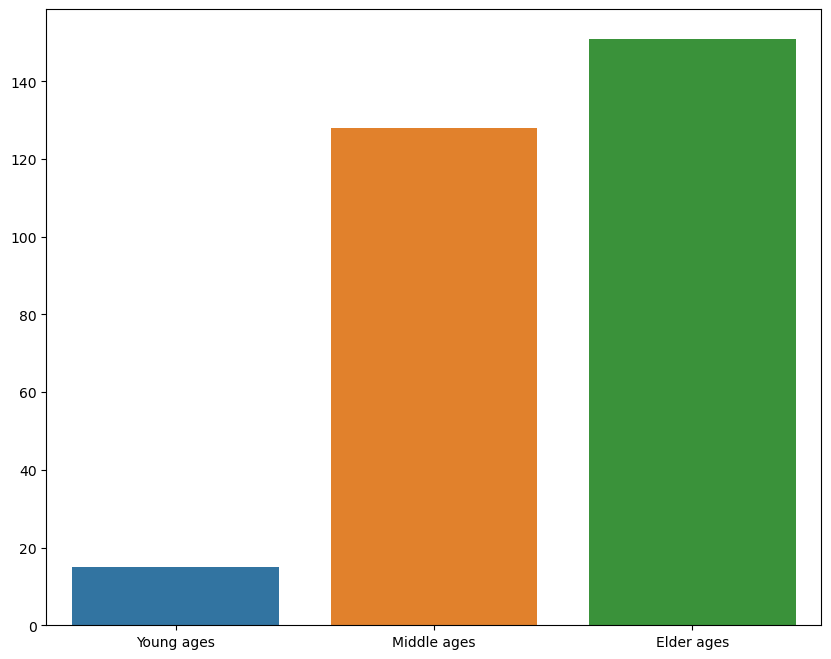

In [24]:
Young = df[(df.age>=29) & (df.age<40)]
Middle = df[(df.age>=40) & (df.age<55)]
Elder = df[df.age>55]

plt.figure(figsize=(10,8))
sns.barplot(x=['Young ages','Middle ages','Elder ages'],y=[len(Young),len(Middle),len(Elder)])
plt.show()

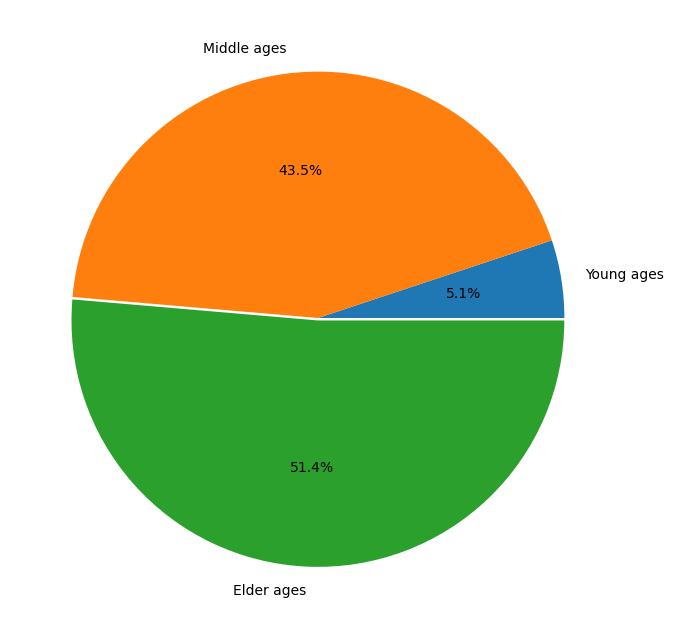

In [25]:
plt.figure(figsize=(10,8))
plt.pie([len(Young),len(Middle),len(Elder)],labels=['Young ages','Middle ages','Elder ages'],
        explode=[0,0,0.01],autopct='%1.1f%%')
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


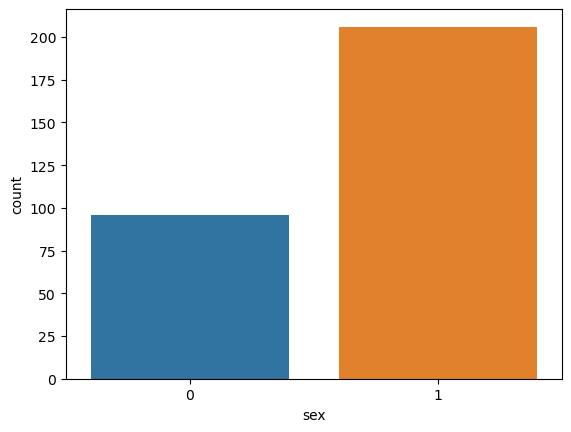

In [26]:
sns.countplot(df['sex'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


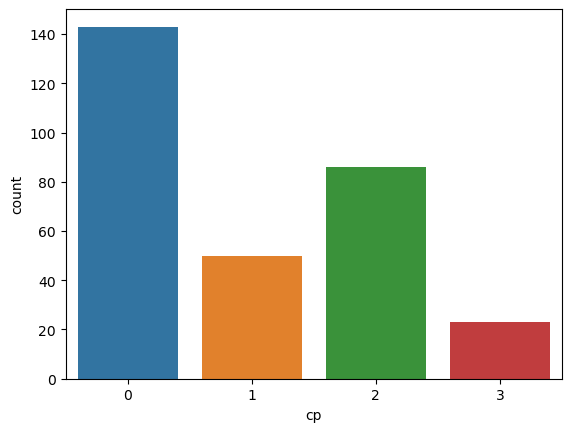

In [27]:
sns.countplot(df['cp'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


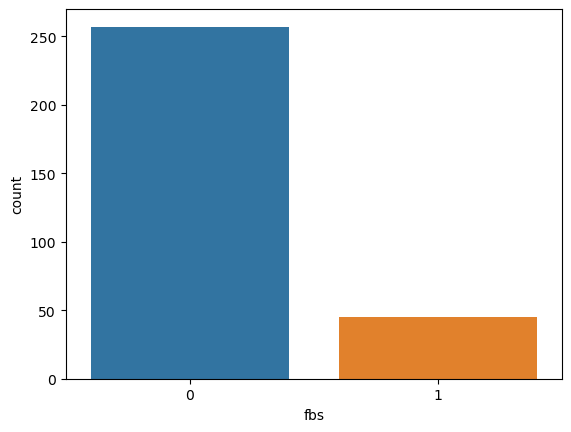

In [28]:
sns.countplot(df['fbs'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


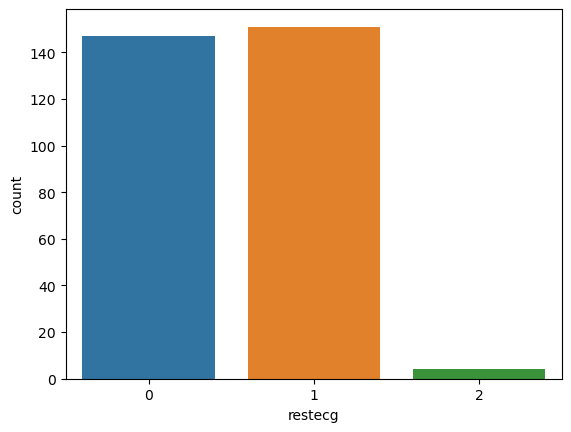

In [29]:
sns.countplot(df['restecg'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


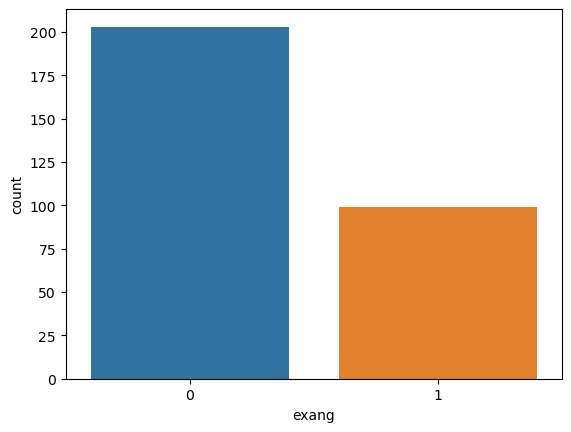

In [30]:
sns.countplot(df['exang'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


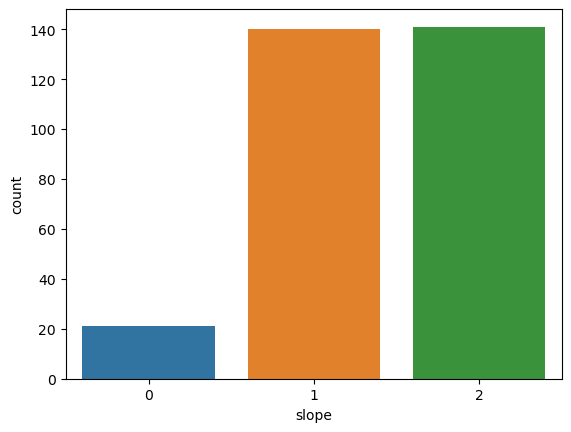

In [31]:
sns.countplot(df['slope'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


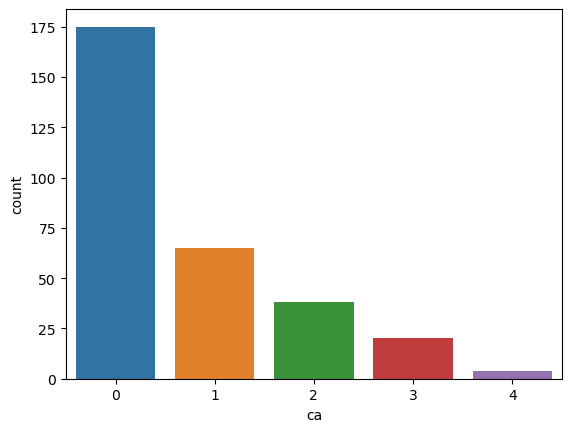

In [32]:
sns.countplot(df['ca'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


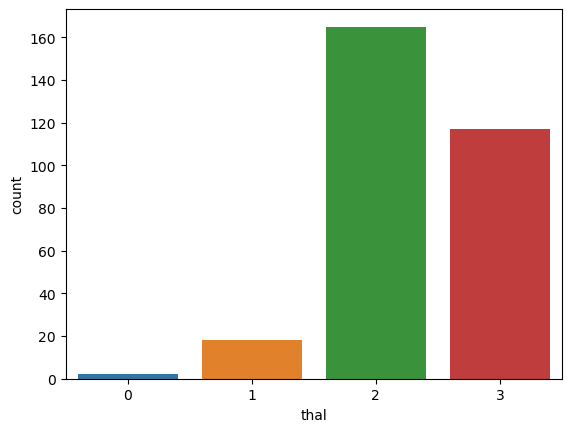

In [33]:
sns.countplot(df['thal'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


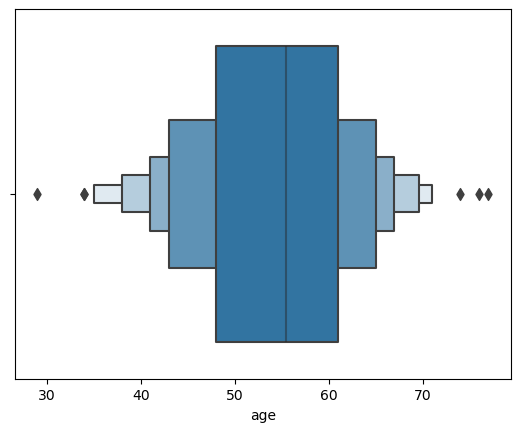

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


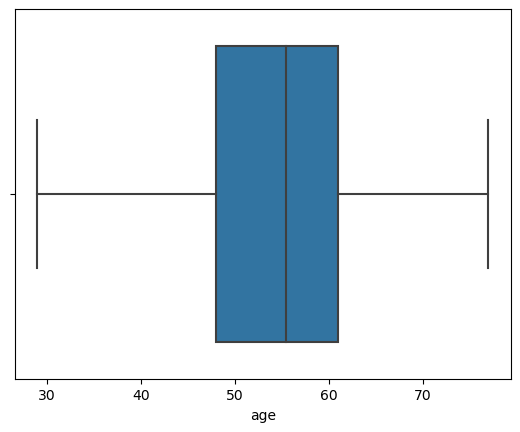

In [34]:
sns.boxenplot(df['age'])
plt.show()

sns.boxplot(df['age'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


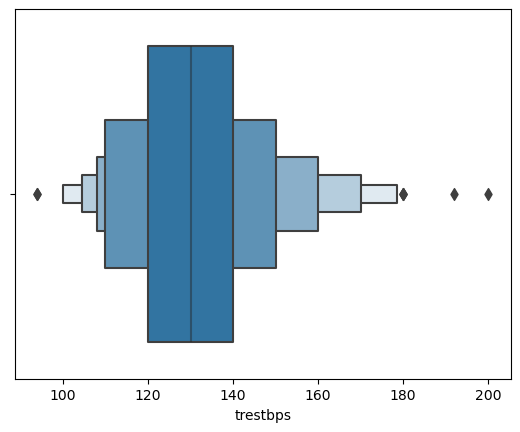

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


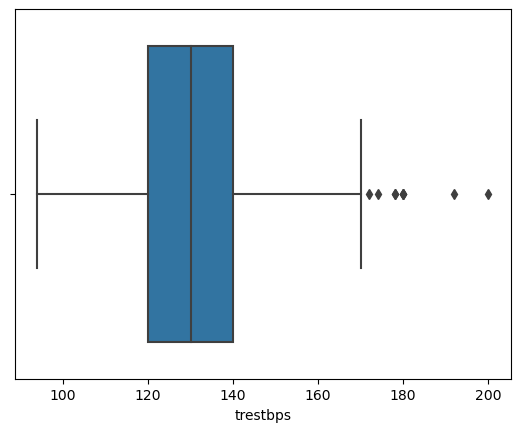

In [35]:
sns.boxenplot(df['trestbps'])
plt.show()

sns.boxplot(df['trestbps'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


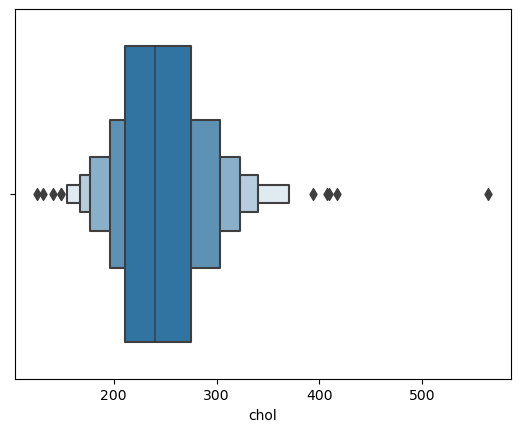

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


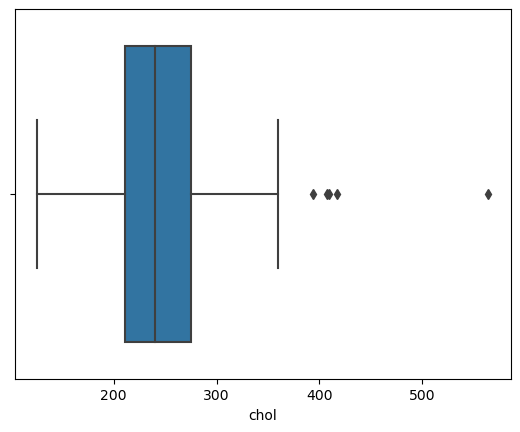

In [36]:
sns.boxenplot(df['chol'])
plt.show()

sns.boxplot(df['chol'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


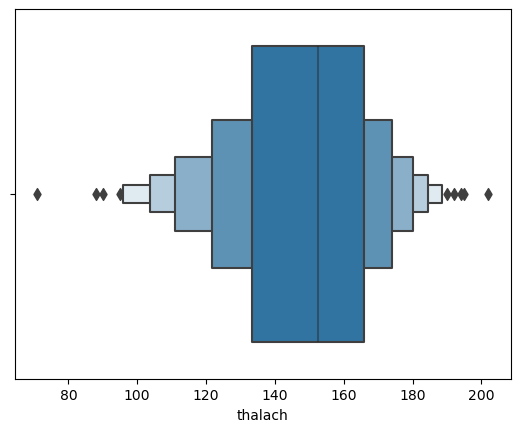

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


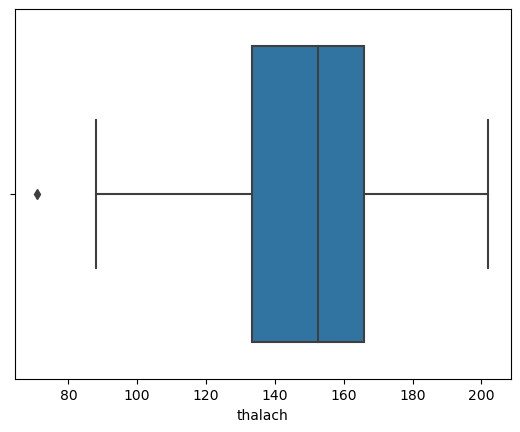

In [37]:
sns.boxenplot(df['thalach'])
plt.show()

sns.boxplot(df['thalach'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


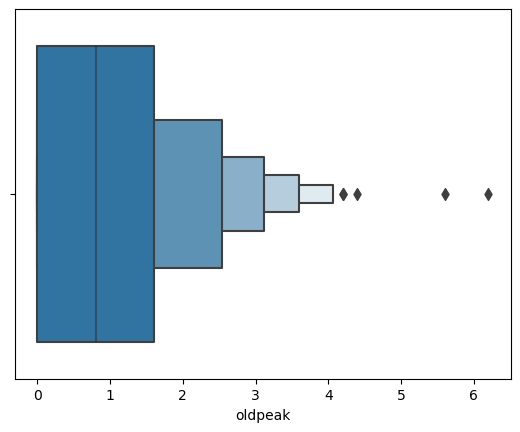

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


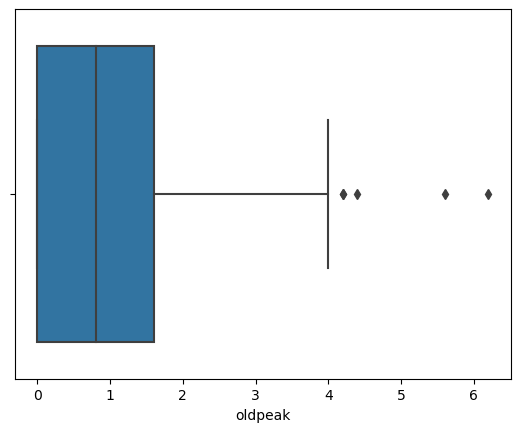

In [38]:
sns.boxenplot(df['oldpeak'])
plt.show()

sns.boxplot(df['oldpeak'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


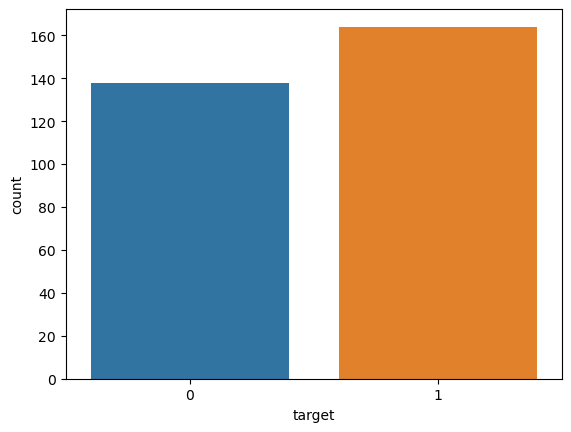

In [39]:
sns.countplot(df['target'])
plt.show()

In [40]:
df[con_cols].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


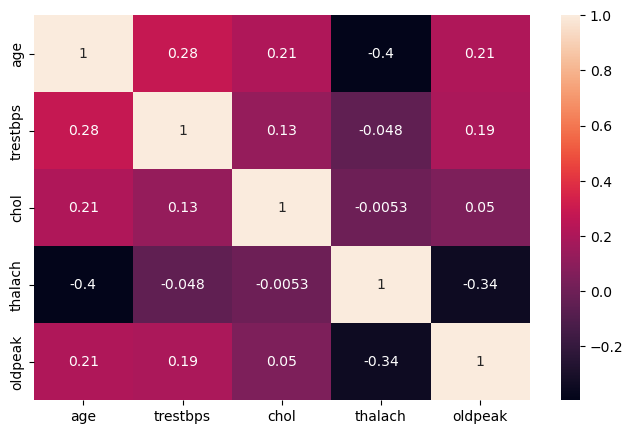

In [41]:
plt.figure(figsize=(8,5))
sns.heatmap(df[con_cols].corr(),annot=True)
plt.show()

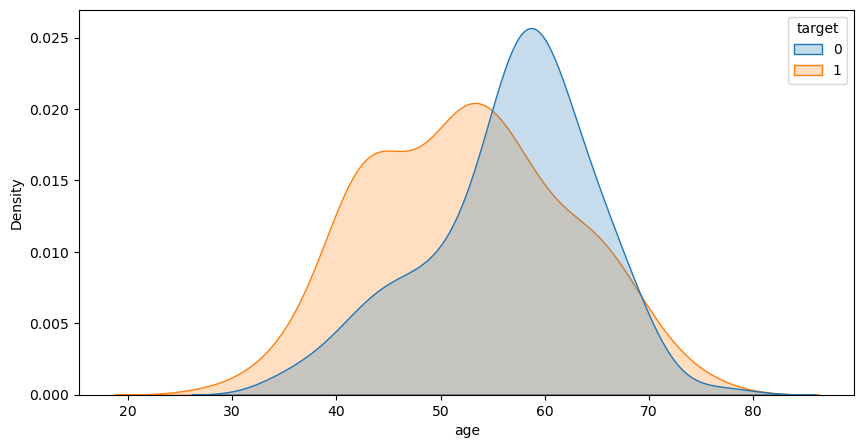

In [42]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['age'],hue=df['target'],fill=True)
plt.show()

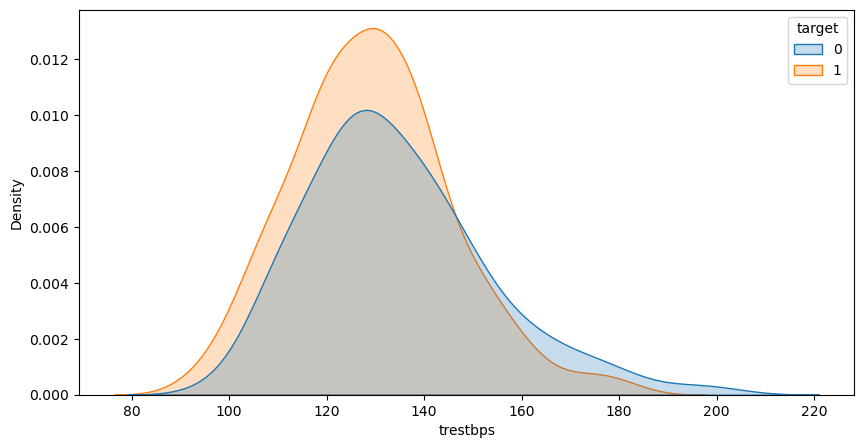

In [43]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['trestbps'],hue=df['target'],fill=True)
plt.show()

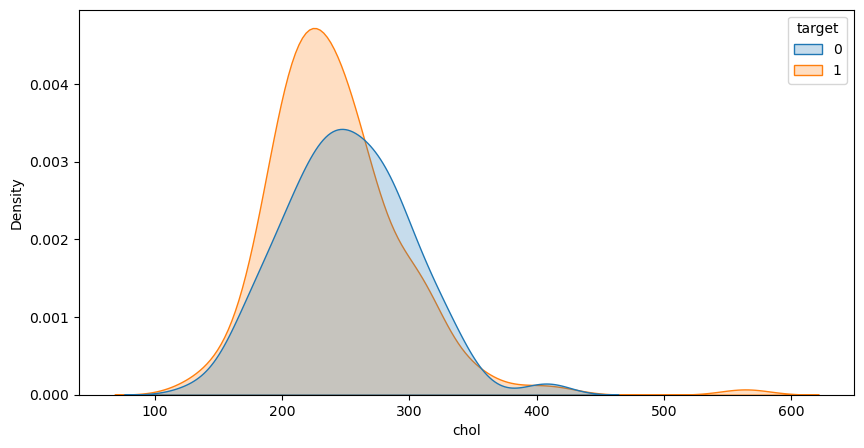

In [44]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['chol'],hue=df['target'],fill=True)
plt.show()

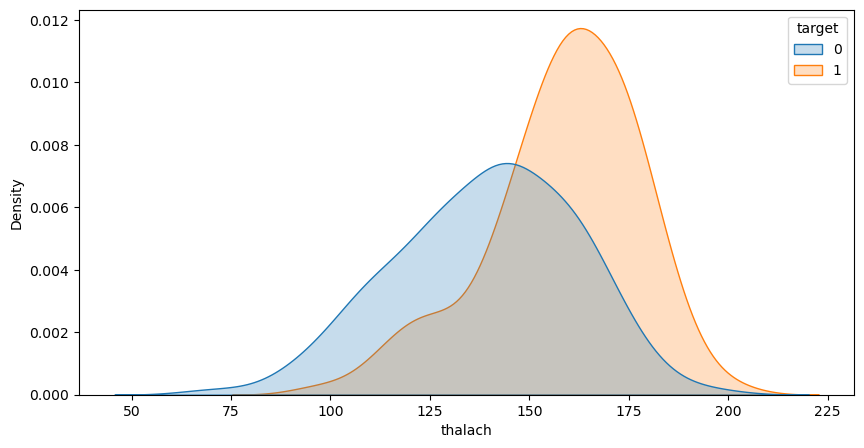

In [45]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['thalach'],hue=df['target'],fill=True)
plt.show()

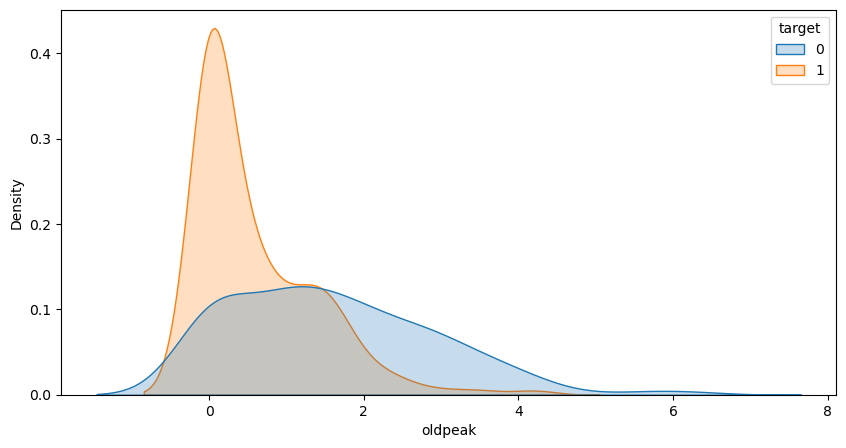

In [46]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['oldpeak'],hue=df['target'],fill=True)
plt.show()

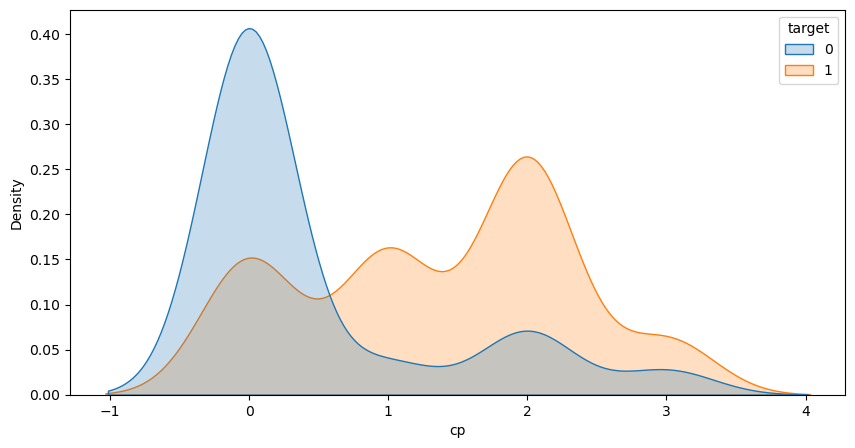

In [47]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['cp'],hue=df['target'],fill=True)
plt.show()

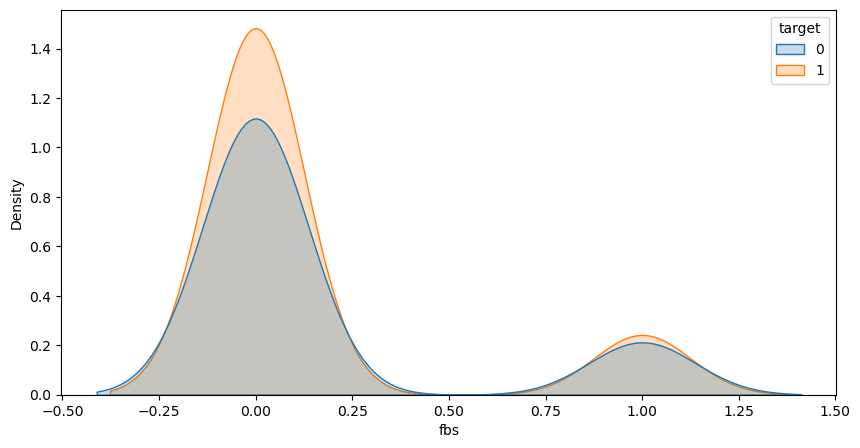

In [48]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['fbs'],hue=df['target'],fill=True)
plt.show()

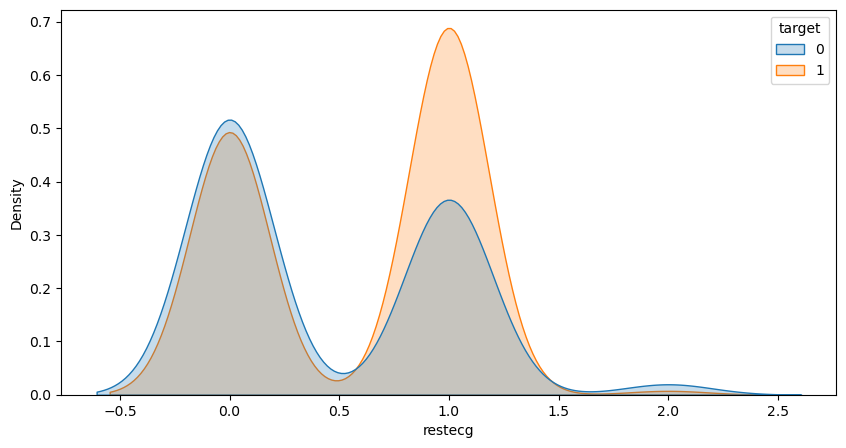

In [49]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['restecg'],hue=df['target'],fill=True)
plt.show()

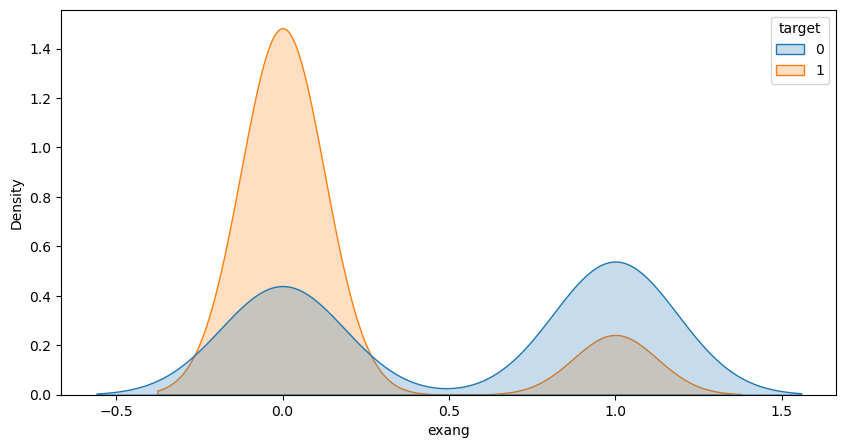

In [50]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['exang'],hue=df['target'],fill=True)
plt.show()

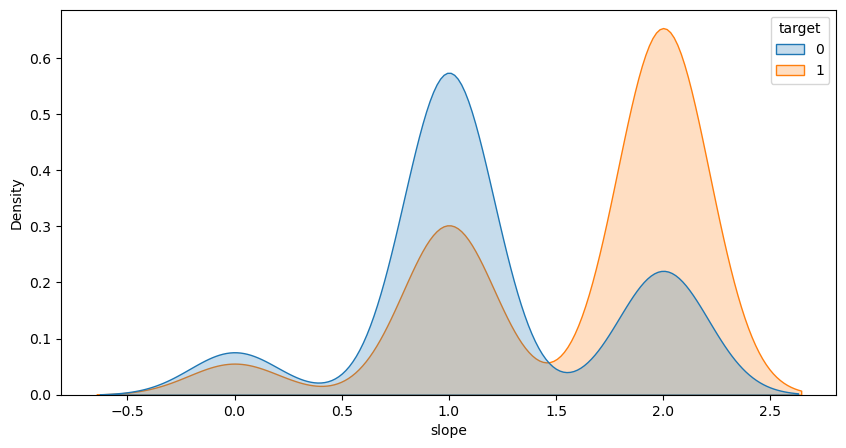

In [51]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['slope'],hue=df['target'],fill=True)
plt.show()

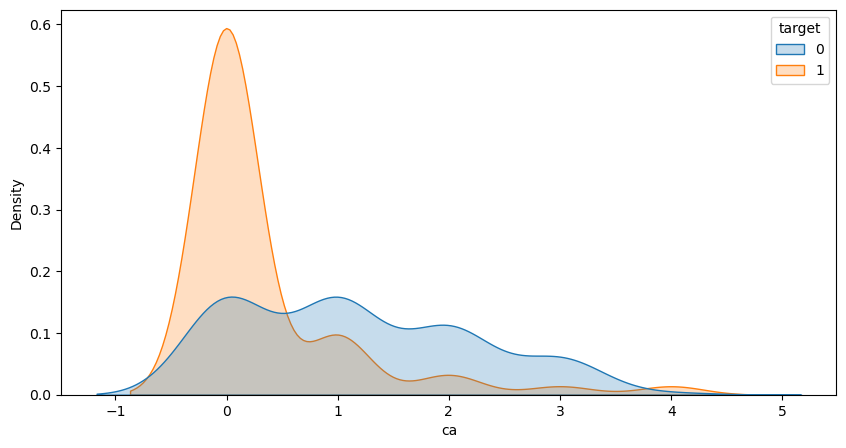

In [52]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['ca'],hue=df['target'],fill=True)
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


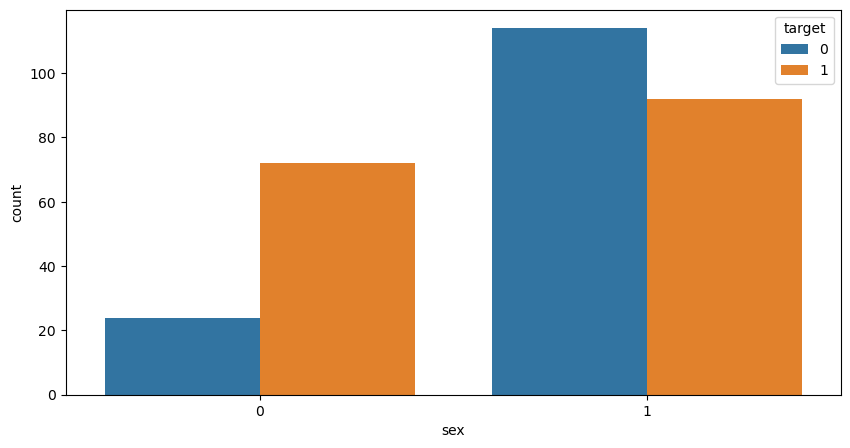

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(df['sex'],hue=df['target'])
plt.show()

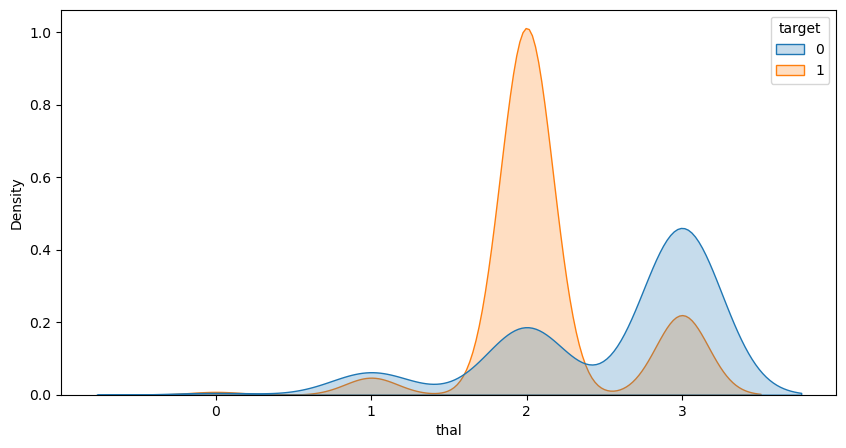

In [54]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['thal'],hue=df['target'],fill=True)
plt.show()

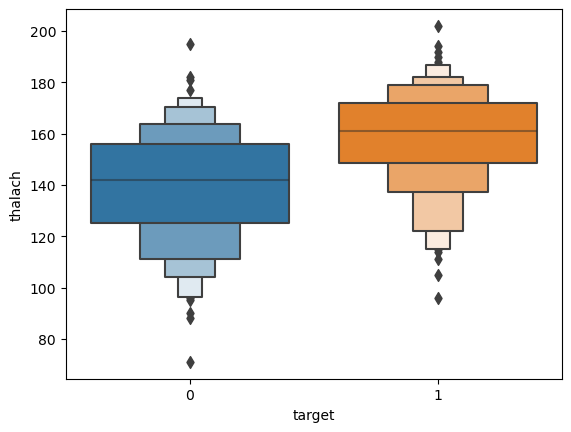

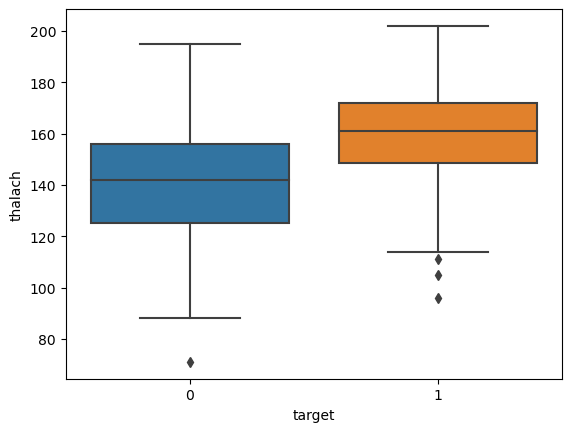

In [55]:
sns.boxenplot(y=df['thalach'],x=df['target'])
plt.show()

sns.boxplot(y=df['thalach'],x=df['target'])
plt.show()

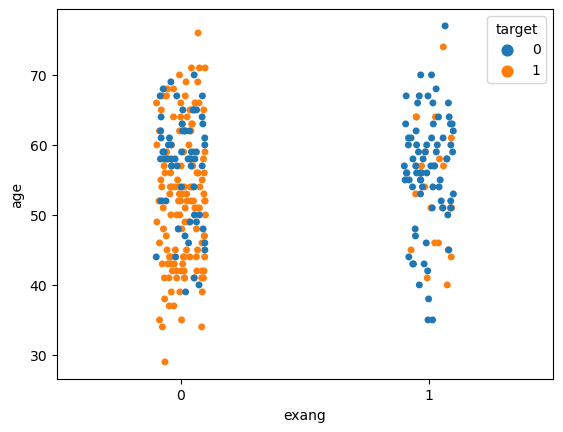

In [56]:
sns.stripplot(x=df['exang'],y=df['age'],hue=df['target'])
plt.show()

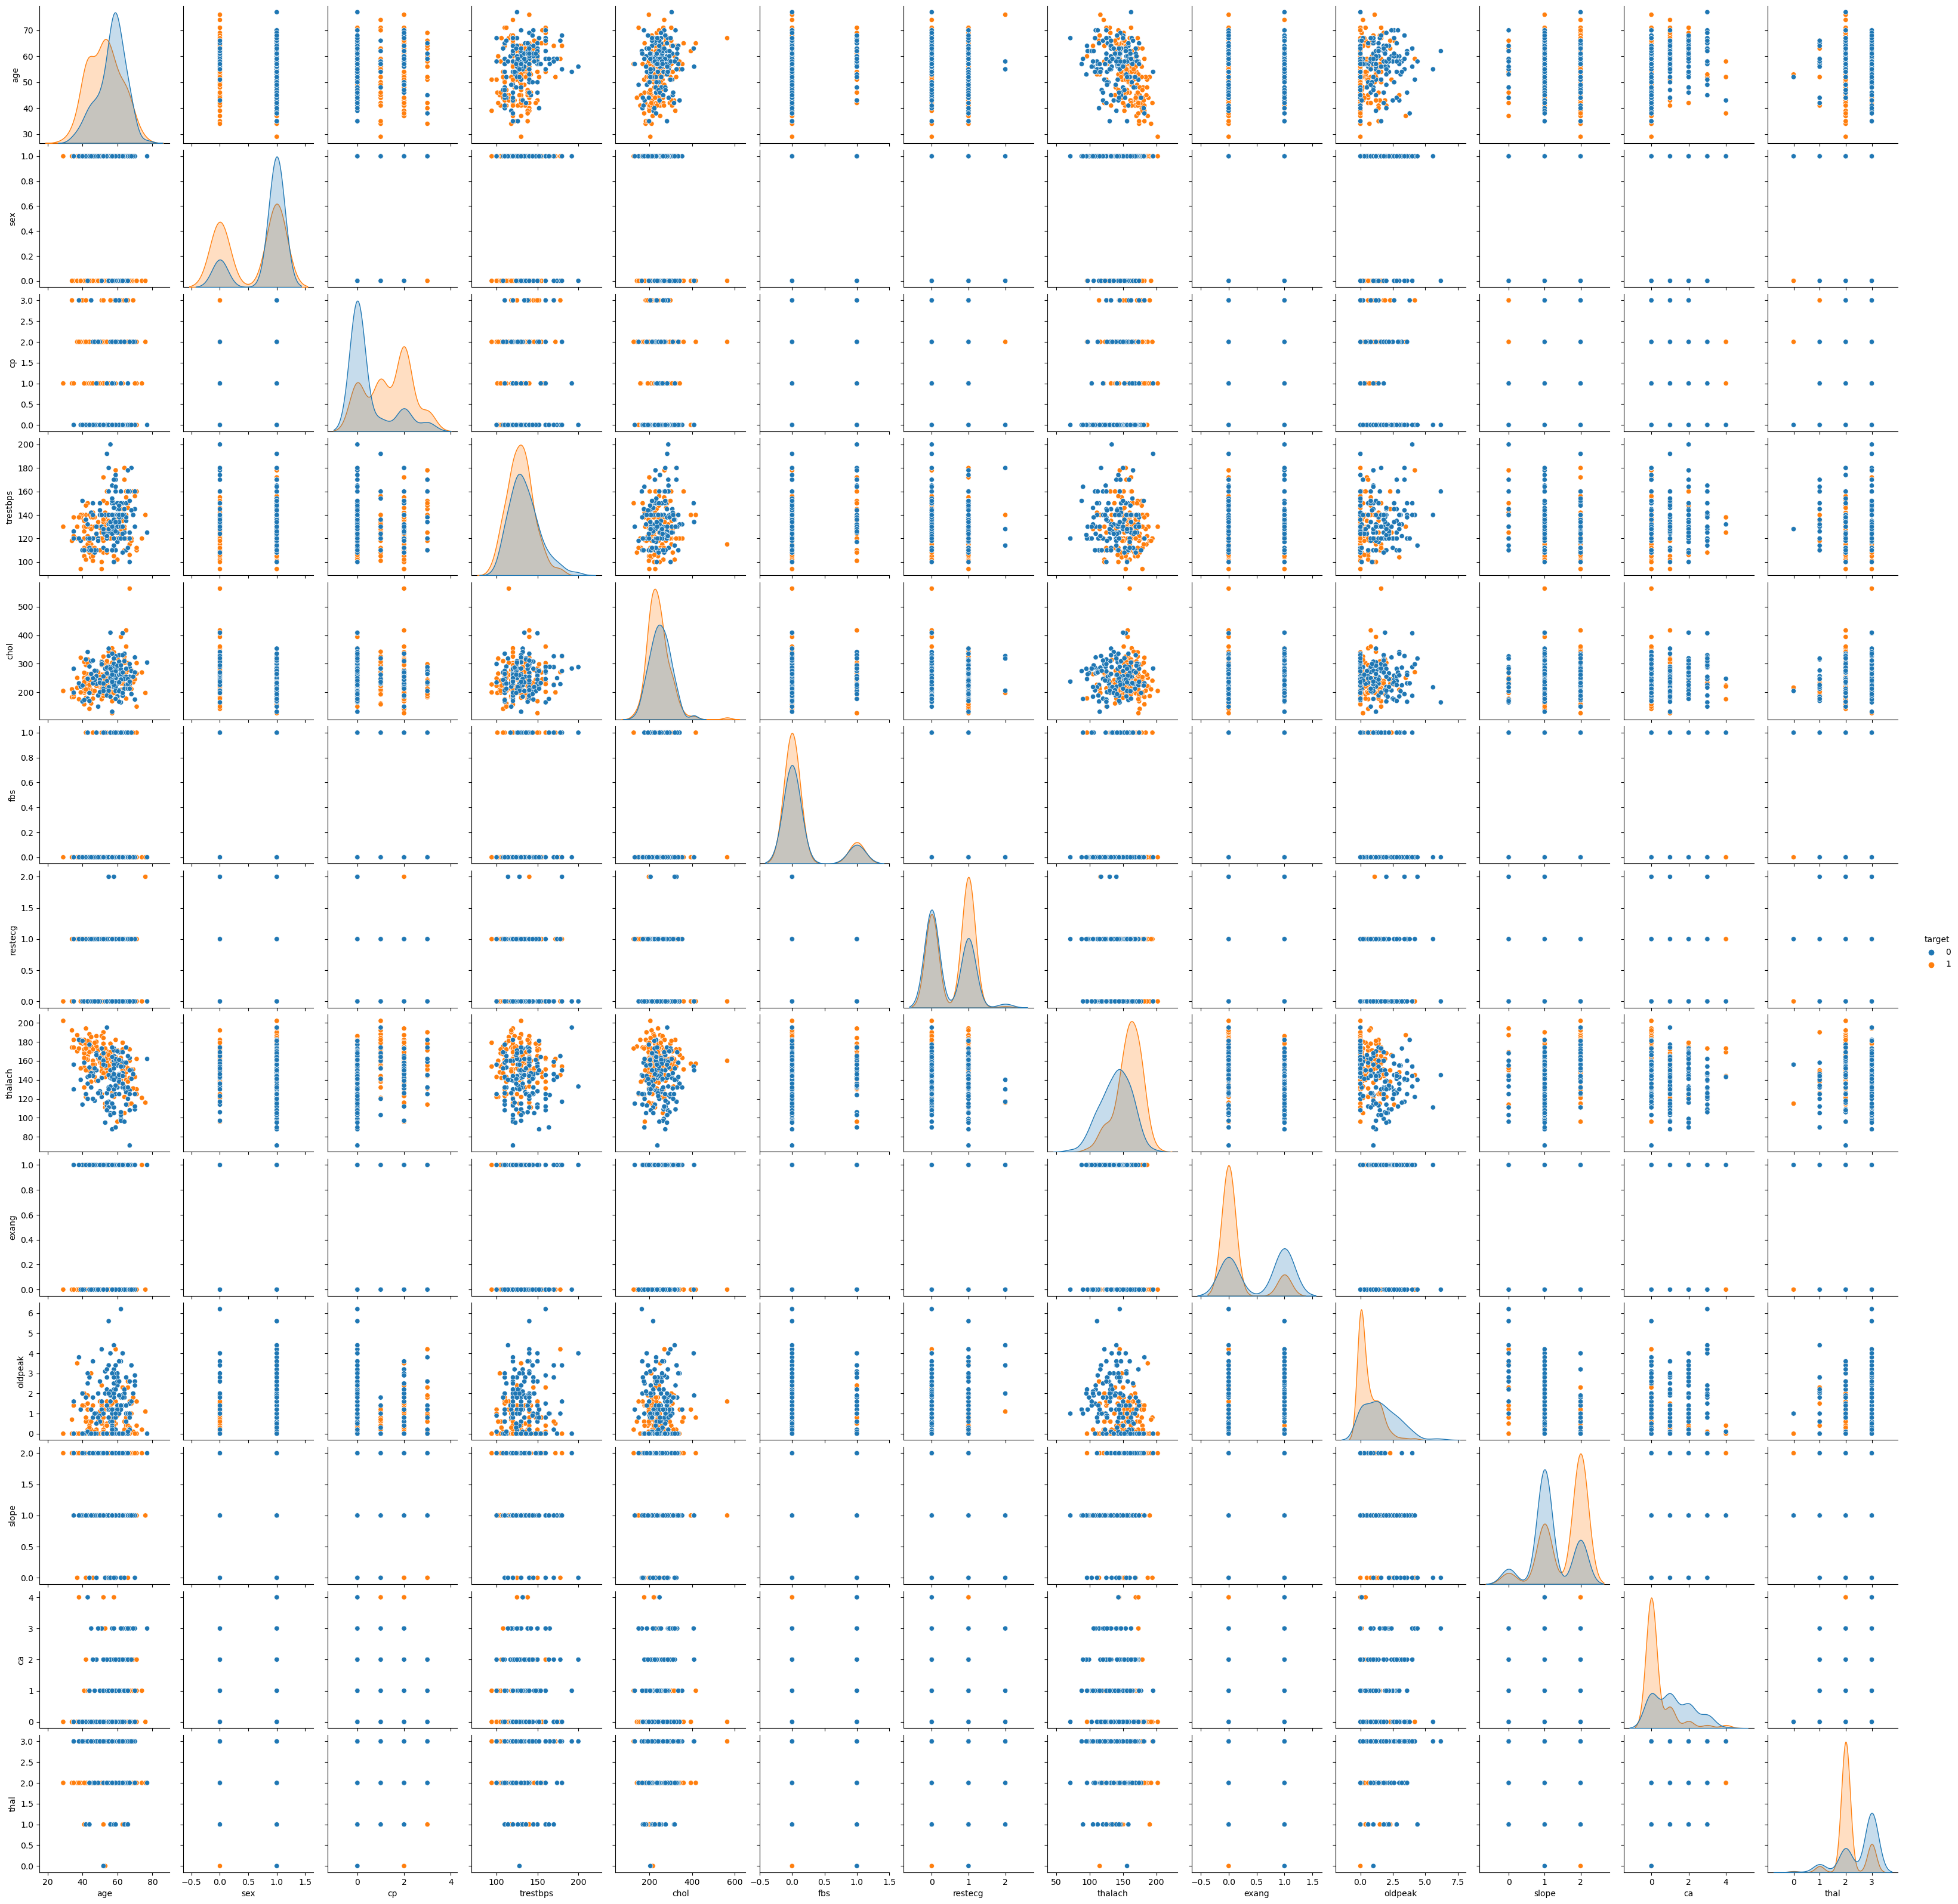

In [57]:
sns.pairplot(df,hue='target')
plt.show()

# 3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [58]:
df1 = df

In [59]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
con_cols = ['age','trestbps','chol','thalach','oldpeak']

In [61]:
df1 = pd.get_dummies(df1, columns=cat_cols)

In [62]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [63]:
X = df1.drop(['target'],axis=1)

In [64]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [65]:
y = df1['target']

In [66]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
std = StandardScaler()

In [69]:
X[con_cols] = std.fit_transform(X[con_cols])

In [70]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(X_train,y_train)

LogisticRegression()

In [76]:
from sklearn.feature_selection import f_regression

In [77]:
reg_score = pd.DataFrame(f_regression(X_train,y_train))
reg_score

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,10.979172,5.790709,0.315221,4.680671e+01,5.107591e+01,23.169146,23.169146,6.881119e+01,12.878390,23.933569,...,4.136295e+01,6.764737e+01,17.902679,17.146113,8.001474,0.172190,0.825156,3.211829,9.351766e+01,7.780579e+01
1,0.001064,0.016871,0.575020,6.520819e-11,1.070977e-11,0.000003,0.000003,7.945327e-15,0.000403,0.000002,...,6.822119e-10,1.257446e-14,0.000033,0.000048,0.005071,0.678545,0.364592,0.074373,6.997584e-19,2.429851e-16


In [78]:
print('F-score :',reg_score[0:])

F-score :           0         1         2             3             4          5   \
0  10.979172  5.790709  0.315221  4.680671e+01  5.107591e+01  23.169146   
1   0.001064  0.016871  0.575020  6.520819e-11  1.070977e-11   0.000003   

          6             7          8          9   ...            20  \
0  23.169146  6.881119e+01  12.878390  23.933569  ...  4.136295e+01   
1   0.000003  7.945327e-15   0.000403   0.000002  ...  6.822119e-10   

             21         22         23        24        25        26        27  \
0  6.764737e+01  17.902679  17.146113  8.001474  0.172190  0.825156  3.211829   
1  1.257446e-14   0.000033   0.000048  0.005071  0.678545  0.364592  0.074373   

             28            29  
0  9.351766e+01  7.780579e+01  
1  6.997584e-19  2.429851e-16  

[2 rows x 30 columns]


In [79]:
print('P-score :',reg_score[1:])

P-score :          0         1        2             3             4         5   \
1  0.001064  0.016871  0.57502  6.520819e-11  1.070977e-11  0.000003   

         6             7         8         9   ...            20  \
1  0.000003  7.945327e-15  0.000403  0.000002  ...  6.822119e-10   

             21        22        23        24        25        26        27  \
1  1.257446e-14  0.000033  0.000048  0.005071  0.678545  0.364592  0.074373   

             28            29  
1  6.997584e-19  2.429851e-16  

[1 rows x 30 columns]


In [80]:
y_pred = lr.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
print('Accuracy Score :',accuracy_score(y_test,y_pred)*100)

Accuracy Score : 88.52459016393442


In [83]:
print(confusion_matrix(y_test,y_pred))

[[27  2]
 [ 5 27]]


In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



#### Accuracy score from Logistic Regression is 88.52%

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rdc = RandomForestClassifier()

In [88]:
rdc.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
y_pred1 = rdc.predict(X_test)

In [90]:
print('Accuracy Score :',accuracy_score(y_test,y_pred1)*100)

Accuracy Score : 85.24590163934425


In [91]:
print(confusion_matrix(y_test,y_pred1))

[[26  3]
 [ 6 26]]


In [92]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



#### Accuracy score from Random Forest is 85.23%